# **Project Overview: Acme Sales & Margin Optimization**
## **Objective**
The project aims to generate a synthetic dataset representing Acme Company's sales, margin, and business constraints across multiple portfolios, geographies, and product segments. The goal is to optimize and analyze sales and margin trends under various constraints to support strategic decision-making.

## **Key Components**
### **1. Synthetic Data Generation**
- Created a structured dataset with portfolios, geographies, categories, brands, and segments.
- Assigned random values for sales, margin, trends, and contribution factors.
- Ensured variability while maintaining realistic business constraints.

### **2. Optimization Goals**
#### **a. Maximize Sales**
- Determines the absolute maximum sales achievable given Acme's constraints.
- Helps leadership assess the feasibility of growth targets.

#### **b. Maximize Margin**
- Similar to sales maximization but focused on profit margins.
- Identifies optimal product and market combinations for highest profitability.

#### **c. Sales Target Optimization**
- Determines the best path to reach a given sales target while maximizing margins.
- Ensures profitability while meeting revenue goals.

#### **d. Margin Target Optimization**
- Identifies strategies to meet a margin target while maximizing sales.
- Balances growth and profitability for sustainable expansion.

### **3. 5-Year Projections**
- Calculates projected sales and margins annually over a 5-year period.
- Allows constraints to be adjusted per year for flexibility.
- Provides insights into long-term business trends.

### **4. Visualization & Reporting**
- Graphical representation of 5-year projections for sales and margin trends.
- Tabular breakdown of projected financial outcomes.
- Supports data-driven decision-making for executives.

## **Impact**
This project provides Acme Company with a robust analytical framework to evaluate growth potential, set realistic financial goals, and optimize revenue and margin strategies under defined business constraints.

In [3]:
import numpy as np 
import pandas as pd

1. Synthetic Data Set <br>
a. Create a synthetic data set that demonstrates you understand the 
structure of Acme and the idea of the constraints they wish to set up. 
<br> b. Your synthetic data set will produce an initial sales number and margin 
(that are realistic) for each of the segments along with a scenario of 
different constraints to run the algorithm on.

#  Generating the Synthetic Data 

In [4]:
np.random.seed(42)

**Structuring the data**

In [5]:
portfolios = ["Skin/Body", "Fragrance + Color Cosmetics", "Hair/APDO"]
geographies = ["North America", "Europe", "South America", "Asia"]
categories = ["Hair Dye", "Face Make-Up", "Make Up Brushes", "Tools", "Fragrance"]
brands = ["Bobbi Brown", "Elizabeth Arden", "Frederic Malle", "Balmain", "Kilian", ]
segments = ["Lipstick", "Mascara", "Toner", "Bronzer"]

<B> Generating the data according to Constraints 

In [6]:
data = []
for portfolio in portfolios:
    for geography in geographies:
        for category in categories:
            for brand in brands:
                for segment in segments:
                    sales = np.random.randint(500000, 10000000)  
                    margin = round(np.random.uniform(5, 20), 2)  
                    min_trend = round(np.random.uniform(-5, 0), 2)  
                    max_trend = round(np.random.uniform(0, 10), 2)  
                    min_contribution = round(np.random.uniform(1, 5), 2) 
                    max_contribution = round(np.random.uniform(5, 30), 2) 
                    if min_trend > max_trend:
                        min_trend, max_trend = max_trend, min_trend
                                 
                    data.append([portfolio, geography, category, brand, segment, sales, margin,min_trend, max_trend, min_contribution, max_contribution])

                    



<B> Assigning the columns 

In [7]:
columns = ["Portfolio", "Geography", "Category", "Brand", "Segment","Initial Sales", "Margin", "Min Trend", "Max Trend","Min Contribution", "Max Contribution"]

<B> Creating the Data Frame

In [8]:
df = pd.DataFrame(data, columns=columns)

<b> EDA

In [9]:
df.head()

,Portfolio,Geography,Category,Brand,Segment,Initial Sales,Margin,Min Trend,Max Trend,Min Contribution,Max Contribution
0,Skin/Body,North America,Hair Dye,Bobbi Brown,Lipstick,6923388,7.75,-1.10,5.97,2.78,7.50
1,Skin/Body,North America,Hair Dye,Bobbi Brown,Mascara,7704212,14.02,-1.46,0.21,4.88,25.81
2,Skin/Body,North America,Hair Dye,Bobbi Brown,Toner,6519877,5.01,-0.04,6.17,3.45,5.18
3,Skin/Body,North America,Hair Dye,Bobbi Brown,Bronzer,9805648,12.87,-3.00,0.47,4.90,10.82
4,Skin/Body,North America,Hair Dye,Elizabeth Arden,Lipstick,3775709,16.78,-4.00,5.14,3.37,6.16


In [10]:
df.shape

(1200, 11)

In [11]:
df.isnull().sum()

Portfolio           0
Geography           0
Category            0
Brand               0
Segment             0
Initial Sales       0
Margin              0
Min Trend           0
Max Trend           0
Min Contribution    0
Max Contribution    0
dtype: int64

In [12]:
df.describe()

,Initial Sales,Margin,Min Trend,Max Trend,Min Contribution,Max Contribution
count,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,5.208725e+06,12.333167,-2.457325,5.044858,2.979967,17.316667
std,2.677895e+06,4.322713,1.419196,2.909804,1.165234,7.164946
min,5.212530e+05,5.010000,-5.000000,0.000000,1.000000,5.010000
25%,2.939734e+06,8.657500,-3.640000,2.507500,1.970000,11.165000
50%,5.236218e+06,12.405000,-2.410000,5.100000,2.940000,17.500000
75%,7.465811e+06,16.170000,-1.250000,7.625000,4.002500,23.385000
max,9.995231e+06,19.990000,-0.010000,9.980000,5.000000,29.980000


2. Maximize Sales:  
a. Develop an algorithm whose output will show the absolute maximum in 
sales the company can hit given the constraints they set. It is meant to 
inform a leadership conversation so for example if the CEO comes in and 
says they want to grow by $100M, the Chief Financial Officer can run this 
portion of the algorithm and see that even at the maximum Acme can only 
generate $70M in sales so what they’re asking for is impossible and allow 
them to have a more realistic conversation about growth. 
<br> b. Show the sales, margin, trend and contribution for each unit 

In [13]:
def maximize_sales(df, growth_target):
    df['Max Possible Sales'] = df['Initial Sales'] * (1 + df['Max Trend'])
    total_possible_growth = df['Max Possible Sales'].sum() - df['Initial Sales'].sum()
    
    if total_possible_growth >= growth_target:
        df['Final Sales'] = df['Initial Sales'] * (1 + df['Max Trend'])
        feasible = True
    else:
        df['Final Sales'] = df['Initial Sales'] + (df['Initial Sales'] / df['Initial Sales'].sum()) * total_possible_growth
        feasible = False
    
    return df, feasible, total_possible_growth


In [14]:
max_sales_df, feasible, total_growth = maximize_sales(df, 100000000)

In [15]:
print("Maximum Sales Report")
print(max_sales_df.head())
print("Is the growth possible",feasible)
print("Maximum possible Growth: $",total_growth)

Maximum Sales Report
   Portfolio      Geography  Category            Brand   Segment  \
0  Skin/Body  North America  Hair Dye      Bobbi Brown  Lipstick   
1  Skin/Body  North America  Hair Dye      Bobbi Brown   Mascara   
2  Skin/Body  North America  Hair Dye      Bobbi Brown     Toner   
3  Skin/Body  North America  Hair Dye      Bobbi Brown   Bronzer   
4  Skin/Body  North America  Hair Dye  Elizabeth Arden  Lipstick   

   Initial Sales  Margin  Min Trend  Max Trend  Min Contribution  \
0        6923388    7.75      -1.10       5.97              2.78   
1        7704212   14.02      -1.46       0.21              4.88   
2        6519877    5.01      -0.04       6.17              3.45   
3        9805648   12.87      -3.00       0.47              4.90   
4        3775709   16.78      -4.00       5.14              3.37   

   Max Contribution  Max Possible Sales  Final Sales  
0              7.50         48256014.36  48256014.36  
1             25.81          9322096.52   9322096.5

3. Maximize Margin: <br>
a. This is the same as sales but for margin so they can maximize on margin. 
<br> b. Show the sales, margin, trend and contribution for each unit 

In [ ]:
def maximize_margin(df, margin_target):
    df['Max Possible Margin'] = df['Margin'] * df['Max Contribution']
    total_possible_margin_growth = df['Max Possible Margin'].sum() - df['Margin'].sum()
    
    if total_possible_margin_growth >= margin_target:
        df['Final Margin'] = df['Margin'] * (df['Max Contribution'])
        feasible = True
    else:
        df['Final Margin'] = df['Margin'] + (df['Margin'] / df['Margin'].sum()) * total_possible_margin_growth
        feasible = False
    
    return df, feasible, total_possible_margin_growth

In [28]:
max_margin_df, margin_feasible, total_margin_growth = maximize_margin(df, 0.05)

In [29]:
print("Maximium Margin Report:")
print(max_margin_df.head())
print(f"Is margin achievable",feasible)
print(f"Total Maximum Margin {total_margin_growth}%")

Maximium Margin Report:
   Portfolio      Geography  Category            Brand   Segment  \
0  Skin/Body  North America  Hair Dye      Bobbi Brown  Lipstick   
1  Skin/Body  North America  Hair Dye      Bobbi Brown   Mascara   
2  Skin/Body  North America  Hair Dye      Bobbi Brown     Toner   
3  Skin/Body  North America  Hair Dye      Bobbi Brown   Bronzer   
4  Skin/Body  North America  Hair Dye  Elizabeth Arden  Lipstick   

   Initial Sales  Margin  Min Trend  Max Trend  Min Contribution  \
0        6923388    7.75      -1.10       5.97              2.78   
1        7704212   14.02      -1.46       0.21              4.88   
2        6519877    5.01      -0.04       6.17              3.45   
3        9805648   12.87      -3.00       0.47              4.90   
4        3775709   16.78      -4.00       5.14              3.37   

   Max Contribution  Max Possible Sales  Final Sales  Max Possible Margin  \
0              7.50         48256014.36  48256014.36             0.005812   
1   

4. Hit A Sales Target While Maximizing Margin: <br>
a. This output is a combination approach where the user can set a revenue 
target, say $50M of new sales (the output of the algorithm) and the 
algorithm not only produces a path to achieve $50M in sales, but that the 
path the algorithm generates also maximizes profit margin. See example 
below. 
<br> b. Show the sales, margin, trend and contribution for each unit 

In [24]:
def hit_sales_target_maximize_margin(df, sales_target):
    df['Max Possible Sales'] = df['Initial Sales'] * (1 + df['Max Trend'])
    df['Max Possible Margin'] = df['Margin'] * (df['Max Contribution'])
    
    total_possible_sales = df['Max Possible Sales'].sum()
    
    if total_possible_sales >= sales_target:
        df['Final Sales'] = df['Initial Sales'] * (1 + df['Max Trend'])
        df['Final Margin'] = df['Margin'] * (df['Max Contribution'])
        feasible = True
    else:
        scale_factor = sales_target / total_possible_sales
        df['Final Sales'] = df['Initial Sales'] * (1 + df['Max Trend']) * scale_factor
        df['Final Margin'] = df['Margin'] * (1 + df['Max Contribution']) * scale_factor
        feasible = False
    
    return df, feasible, total_possible_sales

In [25]:
sales_margin_df, sales_margin_feasible, total_sales_possible = hit_sales_target_maximize_margin(df, 50000000)

In [26]:
print("Sales Target with Maximized Margin Data:")
print(sales_margin_df.head())
print(f"Is sales target achievable while maximizing margin? {sales_margin_feasible}")
print(f"Total possible sales: ${total_sales_possible:,.2f}")

Sales Target with Maximized Margin Data:
   Portfolio      Geography  Category            Brand   Segment  \
0  Skin/Body  North America  Hair Dye      Bobbi Brown  Lipstick   
1  Skin/Body  North America  Hair Dye      Bobbi Brown   Mascara   
2  Skin/Body  North America  Hair Dye      Bobbi Brown     Toner   
3  Skin/Body  North America  Hair Dye      Bobbi Brown   Bronzer   
4  Skin/Body  North America  Hair Dye  Elizabeth Arden  Lipstick   

   Initial Sales  Margin  Min Trend  Max Trend  Min Contribution  \
0        6923388    7.75      -1.10       5.97              2.78   
1        7704212   14.02      -1.46       0.21              4.88   
2        6519877    5.01      -0.04       6.17              3.45   
3        9805648   12.87      -3.00       0.47              4.90   
4        3775709   16.78      -4.00       5.14              3.37   

   Max Contribution  Max Possible Sales  Final Sales  Max Possible Margin  \
0              7.50         48256014.36  48256014.36            

5. Hit A Margin Target While Maximizing Sales: <br>
a. The same as objective four but for margin. <br>
b. Show the sales, margin, trend and contribution for each unit 

In [27]:
def hit_margin_target_maximize_sales(df, margin_target):
    df['Max Possible Margin'] = df['Margin'] * (df['Max Contribution'])
    df['Max Possible Sales'] = df['Initial Sales'] * (1 + df['Max Trend'])
    
    total_possible_margin = df['Max Possible Margin'].sum()
    
    if total_possible_margin >= margin_target:
        df['Final Margin'] = df['Margin'] * (df['Max Contribution'])
        df['Final Sales'] = df['Initial Sales'] * (1 + df['Max Trend'])
        feasible = True
    else:
        scale_factor = margin_target / total_possible_margin
        df['Final Margin'] = df['Margin'] * (1 + df['Max Contribution']) * scale_factor
        df['Final Sales'] = df['Initial Sales'] * (1 + df['Max Trend']) * scale_factor
        feasible = False
    
    return df, feasible, total_possible_margin

In [28]:
margin_sales_df, margin_sales_feasible, total_margin_possible = hit_margin_target_maximize_sales(df, 0.1)

In [29]:
print("\nMargin Target with Maximized Sales Data:")
print(margin_sales_df.head())
print(f"Is margin target achievable while maximizing sales? {margin_sales_feasible}")
print(f"Total possible margin: {total_margin_possible}")


Margin Target with Maximized Sales Data:
   Portfolio      Geography  Category            Brand   Segment  \
0  Skin/Body  North America  Hair Dye      Bobbi Brown  Lipstick   
1  Skin/Body  North America  Hair Dye      Bobbi Brown   Mascara   
2  Skin/Body  North America  Hair Dye      Bobbi Brown     Toner   
3  Skin/Body  North America  Hair Dye      Bobbi Brown   Bronzer   
4  Skin/Body  North America  Hair Dye  Elizabeth Arden  Lipstick   

   Initial Sales  Margin  Min Trend  Max Trend  Min Contribution  \
0        6923388    7.75      -1.10       5.97              2.78   
1        7704212   14.02      -1.46       0.21              4.88   
2        6519877    5.01      -0.04       6.17              3.45   
3        9805648   12.87      -3.00       0.47              4.90   
4        3775709   16.78      -4.00       5.14              3.37   

   Max Contribution  Max Possible Sales  Final Sales  Max Possible Margin  \
0              7.50         48256014.36  48256014.36           

6. Projections for Each Year Over a 5 Year Period: <br> 
a. The algorithm should be able to produce results annually over a 5 year 
period with the admins being able to adjust the constraints for across any 
of the years. 

In [30]:
def five_year_projections(df, annual_growth_limits):
    projections = []
    for year in range(1, 6):
        growth_cap = annual_growth_limits.get(year, 0.1)  # Default 10% growth cap
        df[f'Sales Year {year}'] = df['Initial Sales'] * (1 + np.minimum(df['Max Trend'], growth_cap))
        df[f'Margin Year {year}'] = df['Margin'] * (1 + np.minimum(df['Max Contribution'], growth_cap))
        projections.append(df[[f'Sales Year {year}', f'Margin Year {year}']].sum())
    return df, projections

In [31]:
annual_growth_limits = {1: 0.08, 2: 0.10, 3: 0.12, 4: 0.07, 5: 0.05}  # Customizable constraints
projections_df, yearly_projections = five_year_projections(df, annual_growth_limits)

In [32]:
print("5-Year Projections:")
for year, proj in enumerate(yearly_projections, start=1):
    print(f"Year {year}: Sales = ${proj[f'Sales Year {year}']:,.2f}, Margin = {proj[f'Margin Year {year}']:.2%}")

5-Year Projections:
Year 1: Sales = $6,748,184,354.06, Margin = 1598378.40%
Year 2: Sales = $6,872,173,009.98, Margin = 1627978.00%
Year 3: Sales = $6,996,100,253.46, Margin = 1657577.60%
Year 4: Sales = $6,686,190,026.10, Margin = 1583578.60%
Year 5: Sales = $6,562,023,227.34, Margin = 1553979.00%


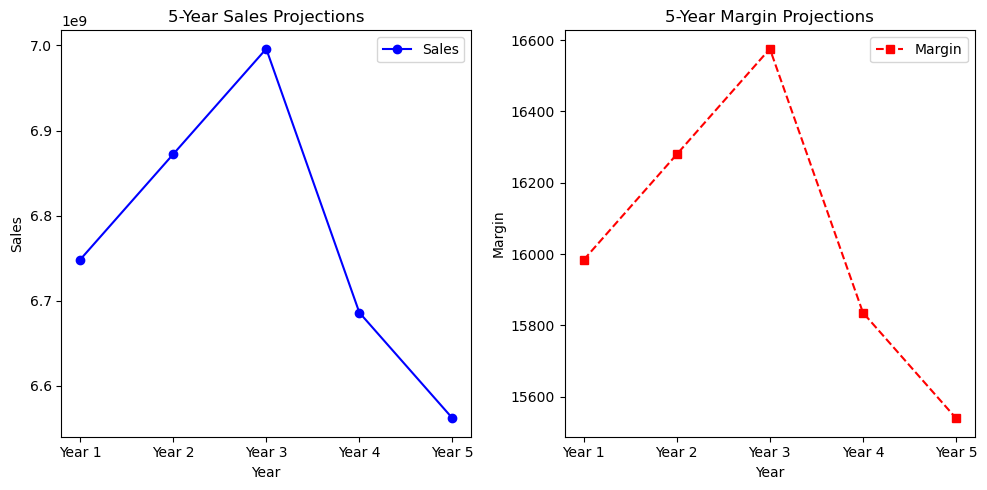

In [33]:
import matplotlib.pyplot as plt
years = [f'Year {i}' for i in range(1, 6)]
sales_values = [proj[f'Sales Year {i}'] for i, proj in enumerate(yearly_projections, start=1)]
margin_values = [proj[f'Margin Year {i}'] for i, proj in enumerate(yearly_projections, start=1)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(years, sales_values, marker='o', linestyle='-', color='b', label='Sales')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales')
ax1.set_title('5-Year Sales Projections')
ax1.legend()
ax2.plot(years, margin_values, marker='s', linestyle='--', color='r', label='Margin')
ax2.set_xlabel('Year')
ax2.set_ylabel('Margin')
ax2.set_title('5-Year Margin Projections')
ax2.legend()
plt.tight_layout()
plt.show()